In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [6]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('diabetes.csv', header= None,
names=col_names)
print(data.shape)
data.head()

(769, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [7]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [9]:
feature_cols = ['pregnant', 'insulin', 'bmi',
'age', 'glucose', 'bp', 'pedigree']
x=data[feature_cols]
y=data.label
# Remove the header row
x = x.iloc[1:]
y = y.iloc[1:]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
test_size=0.3, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape,
y_test.shape)

(538, 7)

(538,)

(231, 7)

(231,)

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('diabetes.csv')

# Separate features and target
x = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ensure only numeric columns are passed
print(x_train.dtypes)

# Apply scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


In [17]:
model= SVC (kernel='rbf', random_state=0)
model.fit(x_train, y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction: ', svc_prediction)

svc_prediction:  [0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [21]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [ kernerl rbf]')
print('Confusion Matrix: \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score: ', Accuracy_score)
print('Accuracy in Percentage', int (Accuracy_score*100),'%')
print(classification_report(svc_prediction, y_test))

SVC [ kernerl rbf]
Confusion Matrix: 
 [[82 17]
 [24 31]]
Accuracy Score:  0.7337662337662337
Accuracy in Percentage 73 %
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       106
           1       0.56      0.65      0.60        48

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.75      0.73      0.74       154



In [23]:
model= SVC(kernel='linear', random_state=0)
model.fit(x_train, y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction: ', svc_prediction)

svc_prediction:  [0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


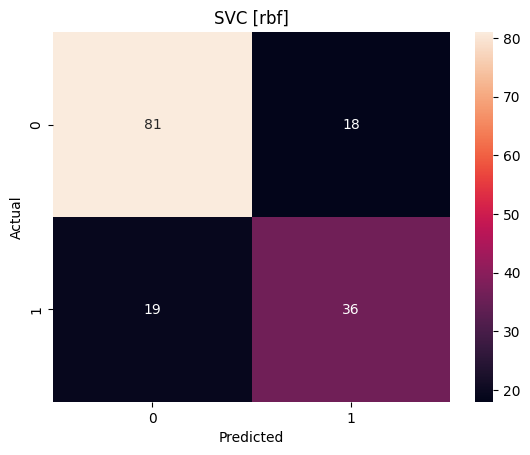

In [30]:
y_pred = model.predict(x_test)

# Now you can create the confusion matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_mat, annot=True).set(title='SVC [rbf]')

plt.show()

In [29]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [ kernerl -linear ]')
print('Confusion Matrix \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score', Accuracy_score)
print('Accuracy in Percentage', int (Accuracy_score*100), '%')
print(classification_report(svc_prediction,y_test))

SVC [ kernerl -linear ]
Confusion Matrix 
 [[81 18]
 [19 36]]
Accuracy Score 0.7597402597402597
Accuracy in Percentage 75 %
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       100
           1       0.65      0.67      0.66        54

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



[Text(0.5, 1.0, 'SVC [linear]')]

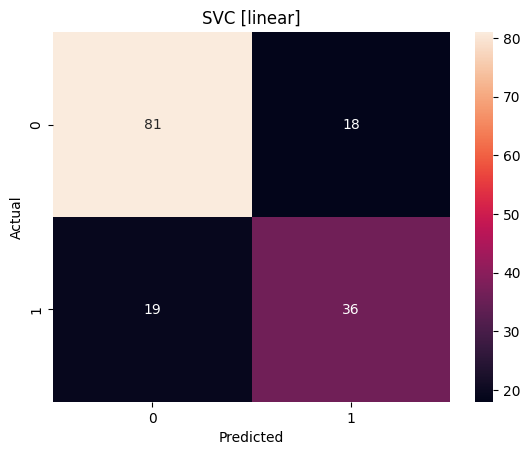

In [31]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],
colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC [linear]')